# Chapter 10: Data Aggregation and Group Operations


### Vroom vroom...

- Let's take a look at some car performance and specification stats.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

auto_1 = pd.read_csv('data1.csv')
print('auto_1 -------------')
print(auto_1.head(2))

origin_map = {1: 'USA', 2: 'Europe', 3: 'Asia'}
print(origin_map)

auto_2 = pd.read_csv('data2.csv')
print('auto_2 -------------')
print(auto_2.head(2))

auto_3 = pd.read_csv('data3.csv')
print('auto_3 -------------')
print(auto_3.head(2))

auto_1 -------------
    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
{1: 'USA', 2: 'Europe', 3: 'Asia'}
auto_2 -------------
            name   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0      Mazda RX4  21.0    6  160.0  110   3.9  2.620  16.46   0   1     4   
1  Mazda RX4 Wag  21.0    6  160.0  110   3.9  2.875  17.02   0   1     4   

   carb  
0     4  
1     4  
auto_3 -------------
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  

### FILLNA

Task 1: Take all cars of the same cylinders and find the average horsepower. If horsepower doesn't have a value set then please set it to the average horsepower of all the other same sized cylinder cars. How many horsepower difference is there between the highest and lowest average?

Requirements: fillna is required in your solution.

Use dataset: auto_1

In [17]:
df1 = auto_1.copy()

df1['horsepower'] = pd.to_numeric(df1['horsepower'], errors='coerce').fillna(np.nan)
dataWithHorsepower = df1[df1['horsepower'] > 0]
fill_func = lambda g: g.fillna(g.mean())

grouped = df1.groupby('cylinders').apply(fill_func)
groupedAgain = grouped['horsepower'].groupby(['cylinders']).mean()
meanDf = groupedAgain.reset_index().sort_values('horsepower')

print(meanDf)

print('Difference between highest and lowest: ', meanDf['horsepower'].max() - meanDf['horsepower'].min())

   cylinders  horsepower
1          4   78.281407
2          5   82.333333
0          3   99.250000
3          6  101.506024
4          8  158.300971
Difference between highest and lowest:  80.01956383861052


### MELT

Task 1: Use dataset auto_2 and graph only Merc cars showing performance metrics: qsec, vs, am, carb, carb, cyl

Requirements: melt is required in your solution.

Use dataset auto_2

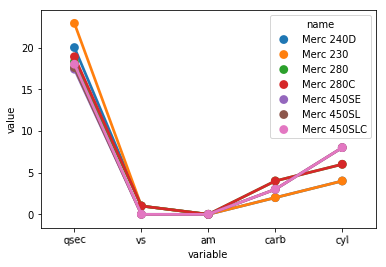

In [25]:
import seaborn as sns

df2 = auto_2.copy()

merc = df2[df2['name'].str.contains('Merc')]

performanceCols = ['qsec', 'vs', 'am', 'carb', 'carb', 'cyl']
idVars = ['name']
merc_melted = pd.melt(merc, id_vars=idVars, value_vars=performanceCols)

fig, ax = plt.subplots()
sns.pointplot(x='variable', y='value', hue='name', data=merc_melted, axis=ax)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=3);

### PIVOT_TABLE and AGGFUNC

Task 1: Display a table showing the averages of MPG per model year broken down by cylinder and origin.

Task 2: Plot a line graph showing the average MPG per year for cars by origin of manufacturing with a 4 cylinder engine.

Requirements: pivot_table and aggfunc is required in your solution.

Use dataset auto_1

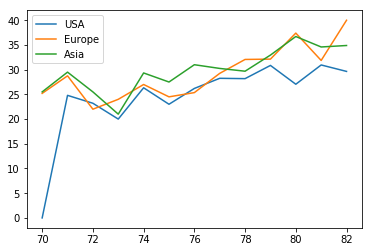

In [26]:
import matplotlib.pyplot as pp

df3 = auto_1.copy()

df3["origin"].replace(origin_map, inplace=True)

df3_pivot = pd.pivot_table(df3, values='mpg', index=['origin', 'cylinders'], columns=['model_year'], fill_value=0, aggfunc=np.mean)

def plot_mpg(origin, cylinders):
    temp_data_df3 = df3_pivot.loc[origin, cylinders]
    pp.plot(temp_data_df3.index, temp_data_df3.values, label=origin)

plot_mpg('USA', 4) # usa
plot_mpg('Europe', 4) # europe
plot_mpg('Asia', 4) # asia
pp.legend(loc='upper left')

### CROSSTAB

Task 1: Display a table showing the car totals by door count broken down by car make and vehicle size.

Requirements: crossbtab is required in your solution.

Use dataset auto_3

In [27]:
pd.crosstab([auto_3['Make'], auto_3['Vehicle Size']], auto_3['Number of Doors'], margins=True)

Number of Doors             2.0  3.0   4.0    All
Make         Vehicle Size                        
Acura        Compact         33    0    29     62
             Midsize         15    0   175    190
Alfa Romeo   Compact          5    0     0      5
Aston Martin Compact         49    0     0     49
             Large            0    0     7      7
             Midsize         37    0     0     37
Audi         Compact         63    0    64    127
             Large            0    0    42     42
             Midsize         24    0   135    159
BMW          Compact         67    0     7     74
             Large            0    0    78     78
             Midsize         73    0   109    182
Bentley      Large           12    0    25     37
             Midsize         37    0     0     37
Bugatti      Compact          3    0     0      3
Buick        Compact          4    0    28     32
             Large            4    0    63     67
             Midsize          8    0    89     97
Cadillac     Compact         51    0    18     69
             Large            7    0   220    227
             Midsize         21    0    80    101
Chevrolet    Compact        145   23   260    428
             Large          118   24   275    417
             Midsize         48   26   204    278
Chrysler     Compact         26    0    11     37
             Large            0    0    76     76
             Midsize          9    0    65     74
Dodge        Compact         81    9   114    204
             Large          122   10   124    256
             Midsize         28   13   125    166
...                         ...  ...   ...    ...
Plymouth     Compact         31    0    30     61
             Large            0    0     8      8
             Midsize          0    3    10     13
Pontiac      Compact         39    3    32     74
             Large            0    0    16     16
             Midsize         34    1    61     96
Porsche      Compact         92    0     0     92
             Large            0    0    22     22
             Midsize          0    0    22     22
Rolls-Royce  Large           11    0    20     31
Saab         Compact         29    0    27     56
             Large            0    0     5      5
             Midsize          0    0    50     50
Scion        Compact         30    0    30     60
Spyker       Compact          3    0     0      3
Subaru       Compact         29    0   123    152
             Midsize          0    0   104    104
Suzuki       Compact         31    0   211    242
             Midsize          0    0   109    109
Tesla        Large            0    0    13     13
Toyota       Compact         86   16   187    289
             Large           26    0   207    233
             Midsize         32    0   192    224
Volkswagen   Compact        306    0   225    531
             Large            0   17    11     28
             Midsize          0    0   250    250
Volvo        Compact          9    0    18     27
             Large            0    0    19     19
             Midsize          3    0   232    235
All                        3160  395  8353  11908

[116 rows x 4 columns]